# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
import numpy as np

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# train_test_split

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia


X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression as LinReg   # alias es mio

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


# se inician los modelos

linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

In [8]:

# regresiones lineales

linreg.fit(X_train, y_train)

lasso.fit(X_train, y_train)

ridge.fit(X_train, y_train)

elastic.fit(X_train, y_train)

ElasticNet()

In [9]:
dict(zip(X.columns, lasso.coef_))

{'CRIM': -0.07660926975110084,
 'ZN': 0.028500635402008676,
 'INDUS': -0.0,
 'CHAS': 0.0,
 'NOX': -0.0,
 'RM': 1.6304889213333715,
 'AGE': 0.016394775352896178,
 'DIS': -0.6308576531098817,
 'RAD': 0.21965363036622965,
 'TAX': -0.012285578213596314,
 'PTRATIO': -0.708582332501208,
 'B': 0.01118110193325242,
 'LSTAT': -0.7471066114528755}

In [10]:
dict(zip(X.columns, linreg.coef_))

{'CRIM': array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01])}

In [11]:
linreg.predict(X_test)[:10]

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597]])

In [12]:
lasso.predict(X_test)[:10]

array([28.46688043, 32.14485066, 13.88690029, 25.38352923, 19.00338648,
       22.02407437, 18.17548349, 12.27474256, 21.89559709, 21.11742406])

In [13]:
ridge.predict(X_test)[:10]

array([[28.69407967],
       [35.69624973],
       [14.14604677],
       [24.77692904],
       [19.12179357],
       [22.3570209 ],
       [17.58912087],
       [14.21475184],
       [22.12847122],
       [20.77279132]])

In [14]:
elastic.predict(X_test)[:10]

array([28.85130613, 32.45417488, 12.83410463, 25.21144414, 19.07217245,
       21.72430367, 18.08730659, 11.59084063, 22.04378007, 21.17869508])

## 3. Calculate and print R-squared for both the training and the testing set.

In [18]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [19]:
r2_train = linreg.score(X_train, y_train)
r2_test = linreg.score(X_test, y_test)


In [20]:
print("R-squared (training set):", r2_train)
print("R-squared (testing set):", r2_test)


R-squared (training set): 0.7508856358979673
R-squared (testing set): 0.6687594935356318


## 4. Calculate and print mean squared error for both the training and the testing set.

In [21]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


In [22]:
print("Mean Squared Error (training set):", mse_train)
print("Mean Squared Error (testing set):", mse_test)


Mean Squared Error (training set): 21.641412753226312
Mean Squared Error (testing set): 24.291119474973527


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [24]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


In [25]:
print("Mean Absolute Error (training set):", mae_train)
print("Mean Absolute Error (testing set):", mae_test)


Mean Absolute Error (training set): 3.314771626783227
Mean Absolute Error (testing set): 3.189091965887839


## Classification Model Evaluation

In [23]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [26]:
# train_test_split

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia


X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [33]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)


In [39]:
y_train_pred

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [40]:
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [37]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [38]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.975
Testing Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [41]:
from sklearn.metrics import balanced_accuracy_score


In [42]:
#Calculate the balanced accuracy score for the training set:
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)


In [43]:
#Calculate the balanced accuracy score for the testing set:
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)


In [44]:
print("Training Balanced Accuracy:", train_balanced_accuracy)
print("Testing Balanced Accuracy:", test_balanced_accuracy)


Training Balanced Accuracy: 0.975609756097561
Testing Balanced Accuracy: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [45]:
#importamos librería
from sklearn.metrics import precision_score

In [50]:
#Calculate the precision score for the training set:
train_precision = precision_score(y_train, y_train_pred,average='macro')


In [49]:
test_precision = precision_score(y_test, y_test_pred,average='macro')


In [51]:
print("Training Precision Score:", train_precision)
print("Testing Precision Score:", test_precision)


Training Precision Score: 0.9761904761904763
Testing Precision Score: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [54]:
#importamos
from sklearn.metrics import recall_score


In [58]:
#recall score para el conjunto de train:
train_recall = recall_score(y_train, y_train_pred, average='macro')
print("Recall score (training set):", train_recall)


Recall score (training set): 0.975609756097561


In [57]:
#recall score para el conjunto de test:
test_recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall score (testing set):", test_recall)


Recall score (testing set): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [59]:
#importamos
from sklearn.metrics import f1_score

#Calcula la puntuación F1 para el conjunto de entrenamiento:
train_f1 = f1_score(y_train, y_train_pred, average='macro')
print("F1 score (training set):", train_f1)

#Calcula la puntuación F1 para el conjunto de prueba:
test_f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 score (testing set):", test_f1)


F1 score (training set): 0.9749960931395533
F1 score (testing set): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [60]:
#importamos
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Calcula la matriz de confusión para el conjunto de entrenamiento:
train_cm = confusion_matrix(y_train, y_train_pred)



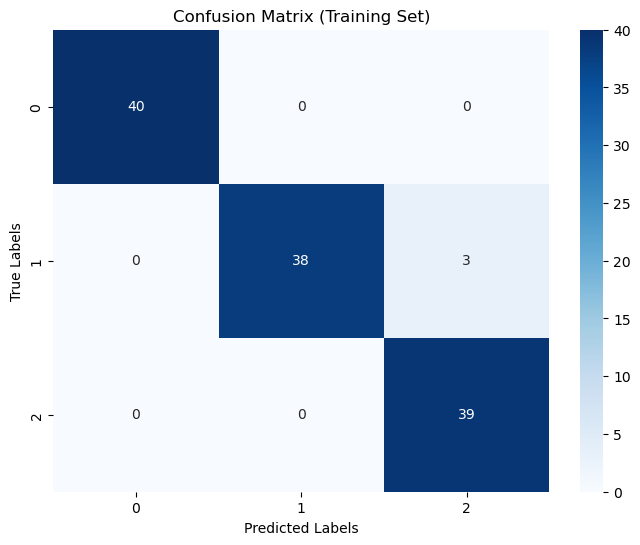

In [61]:
#Genera una visualización de la matriz de confusión para el conjunto de entrenamiento:
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [62]:
#Calcula la matriz de confusión para el conjunto de prueba:
test_cm = confusion_matrix(y_test, y_test_pred)


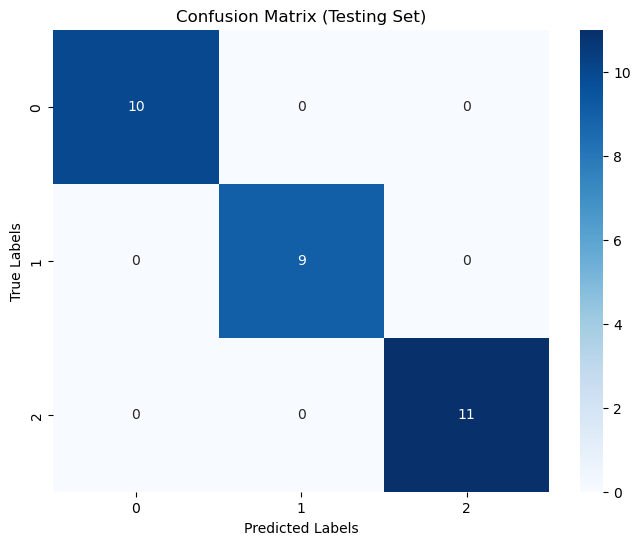

In [63]:
#Genera una visualización de la matriz de confusión para el conjunto de prueba:
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [69]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [74]:
# train_test_split

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia


X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [81]:
#1
"""Importa los modelos adicionales que deseas probar.   
Por ejemplo, si quieres probar un modelo de árbol de decisiones, puedes importar DecisionTreeClassifier de sklearn.tree,    
y si quieres probar un modelo de bosque aleatorio, puedes importar RandomForestClassifier de sklearn.ensemble.  
Asegúrate de tener estos modelos instalados previamente."""

from sklearn.linear_model import LinearRegression as LinReg   # alias es mio

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


In [82]:
#2 Crea instancias de los modelos que deseas probar.
# se inician los modelos
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

In [83]:
#3 Entrena cada modelo en el conjunto de entrenamiento y genera predicciones tanto para el conjunto de entrenamiento como para el conjunto de prueba.
# regresiones lineales

linreg.fit(X_train, y_train)
linreg_train_preds = linreg.predict(X_train)
linreg_test_preds = linreg.predict(X_test)

lasso.fit(X_train, y_train)
lasso_train_preds = lasso.predict(X_train)
lasso_test_preds = lasso.predict(X_test)

ridge.fit(X_train, y_train)
ridge_train_preds = ridge.predict(X_train)
ridge_test_preds = ridge.predict(X_test)

elastic.fit(X_train, y_train)
elastic_train_preds = elastic.predict(X_train)
elastic_test_preds = elastic.predict(X_test)


In [88]:
#4  
"""Calcula y compara las métricas de evaluación para cada modelo en ambos conjuntos de datos.   
Puedes utilizar las funciones de métricas de sklearn.metrics    
como accuracy_score, precision_score, recall_score, f1_score y confusion_matrix."""

"""Para evaluar un modelo de regresión, puedes utilizar métricas como el error cuadrático medio (mean squared error)    
y el error absoluto medio (mean absolute error). Estas métricas te proporcionarán una medida de qué tan cerca están las predicciones del modelo 
de los valores reales."""


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import mean_squared_error

linreg_train_mse = mean_squared_error(y_train, linreg_train_preds)
linreg_test_mse = mean_squared_error(y_test, linreg_test_preds)

lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

elastic_train_mse = mean_squared_error(y_train, elastic_train_preds)
elastic_test_mse = mean_squared_error(y_test, elastic_test_preds)


# Calcula las demás matrices de confusión...


In [90]:
#5
"""Analiza los resultados y compara el rendimiento de los modelos en cada conjunto de datos.    
Puedes utilizar las métricas de evaluación calculadas para determinar qué modelo tiene un mejor rendimiento en términos de precisión,   
recall, F1-score, entre otros.  
También puedes visualizar las matrices de confusión para tener una mejor comprensión del rendimiento de cada modelo."""


# Comparación de modelos en términos de métricas de evaluación
print("Métricas de evaluación en el conjunto de entrenamiento:")
print("Linear Regression MSE:", linreg_train_mse)
print("Lasso Regression MSE:", lasso_train_mse)
print("Ridge Regression MSE:", ridge_train_mse)
print("Elastic Net Regression MSE:", elastic_train_mse)
print()

print("Métricas de evaluación en el conjunto de prueba:")
print("Linear Regression MSE:", linreg_test_mse)
print("Lasso Regression MSE:", lasso_test_mse)
print("Ridge Regression MSE:", ridge_test_mse)
print("Elastic Net Regression MSE:", elastic_test_mse)
print()


# Puedes continuar con las matrices de confusión para los demás modelos



Métricas de evaluación en el conjunto de entrenamiento:
Linear Regression MSE: 21.641412753226312
Lasso Regression MSE: 26.416866673122932
Ridge Regression MSE: 21.824118291575864
Elastic Net Regression MSE: 26.86053107382812

Métricas de evaluación en el conjunto de prueba:
Linear Regression MSE: 24.291119474973527
Lasso Regression MSE: 24.40948976129971
Ridge Regression MSE: 24.47719122770863
Elastic Net Regression MSE: 23.968733210204793



In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo en el conjunto de entrenamiento
regression_model.fit(X_train, y_train)

# Generar predicciones en el conjunto de entrenamiento y el conjunto de prueba
train_preds = regression_model.predict(X_train)
test_preds = regression_model.predict(X_test)

# Calcular y imprimir métricas de evaluación
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train Mean Squared Error: 21.641412753226312
Test Mean Squared Error: 24.291119474973527
Train Mean Absolute Error: 3.314771626783227
Test Mean Absolute Error: 3.189091965887839
Train R-squared: 0.7508856358979673
Test R-squared: 0.6687594935356318
